Primero importamos las librerías necesarias

In [1]:
from pylab import*
import numpy as np
import pandas as pd
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import beta
from sklearn import linear_model

# Pregunta 2

In [2]:
bd="data_schools.xlsx"
bd_escuelas=pd.read_excel(bd)
bd_escuelas #Vemos si cargó

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


## Para n

In [55]:
#Seleccionamos aleatoriamente n escuelas
cor=np.zeros(3200)
for  i in range(0,3200):
    escuelas_random=bd_escuelas.sample(n=15,replace=True)
    cor[i]= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)[0]
print(cor)

[0.4801444  0.89982111 0.73476703 ... 0.59910531 0.76139441 0.70420046]


In [56]:
#El error estándar bootstrap es:
err_bt=np.std(cor)
err_bt

0.1476726831818904

In [57]:
#La correlación sin bootstrap es:
cor_data = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)[0]
cor_data

0.7526621356232132

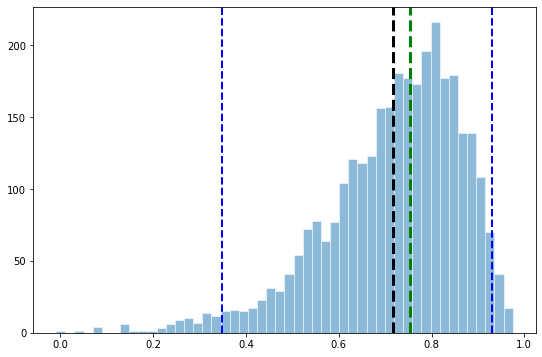

Correlación sin Bootsrap: 0.7526621356232132
Promedio de correlación de la muestras Bootstrap: 0.7178117606845299
Error estándar las muestras Bootstrap: 0.1476726831818904
( 0.34880025748264926 , 0.9303505762726403 )


In [58]:
#Hacemos el gráfico 
fig, ax = plt.subplots(figsize=(9,6))
hist(cor,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=cor_data,color='green', linestyle='--',linewidth=3,label="Correlación sin bootstrap$")
axvline(x=np.mean(cor),color='black', linestyle='--',linewidth=3,label="Promedio de correlación con  Boostrap$")

axvline(percentile(cor,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(cor,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Correlación sin Bootsrap:", cor_data)
print("Promedio de correlación de la muestras Bootstrap:", np.mean(cor))
print("Error estándar las muestras Bootstrap:", err_bt)
print("(", percentile(cor,2.5),",",percentile(cor,97.5),")")

In [25]:
#Podemos notar que conforme el número de simulaciones Boostrap aumenta, el error estándar
#baja.
estimadores_se_bt=np.zeros(3200)
for i in range(len(cor)):
    estimadores_se_bt[i]=np.std(cor[0:(i+1)])
estimadores_se_bt

array([0.        , 0.23808778, 0.20719538, ..., 0.13309749, 0.13307736,
       0.13309356])

In [109]:
min_1=min(estimadores_se_bt[1:])
min_1

0.13138801511477796

In [110]:
index_1=(np.asarray(estimadores_se_bt==min_1).nonzero())[0][0]
index_1

1901

In [94]:
estimadores_se_bt[index_1]

0.13138801511477796

Acorde a esto, 1902 simulaciones boostrap minimiza el error estándar. Ya que el índice i es hasta i+1 iteraciones boostrap

## Para n-1

In [71]:
#Seleccionamos aleatoriamente n-1 escuelas
cor_2=np.zeros(3200)
for  i in range(0,3200):
    escuelas_random=bd_escuelas.sample(n=15,replace=True)
    escuelas_random=escuelas_random.sample(n=14,replace=True)
    cor_2[i]= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)[0]
print(cor_2)

[0.85714286 0.94196429 0.11778218 ... 0.65834322 0.69444444 0.83212228]


In [72]:
#El error estándar bootstrap es:
err_bt_2=np.std(cor_2)
err_bt_2

0.2323708405692049

In [73]:
#La correlación sin bootstrap es:
cor_data = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)[0]
cor_data

0.7526621356232132

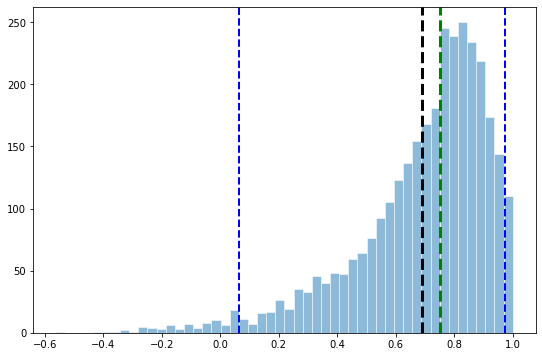

Correlación sin Bootsrap: 0.7526621356232132
Promedio de correlación de la muestras Bootstrap: 0.6906978238464879
Error estándar las muestras Bootstrap: 0.2323708405692049
( 0.06278273098012183 , 0.9749152015732035 )


In [74]:
#Hacemos el gráfico 
fig, ax = plt.subplots(figsize=(9,6))
hist(cor_2,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=cor_data,color='green', linestyle='--',linewidth=3,label="Correlación sin bootstrap$")
axvline(x=np.mean(cor_2),color='black', linestyle='--',linewidth=3,label="Promedio de correlación con  Boostrap$")

axvline(percentile(cor_2,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(cor_2,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Correlación sin Bootsrap:", cor_data)
print("Promedio de correlación de la muestras Bootstrap:", np.mean(cor_2))
print("Error estándar las muestras Bootstrap:", err_bt_2)
print("(", percentile(cor_2,2.5),",",percentile(cor_2,97.5),")")

In [36]:
#Podemos notar que conforme el número de simulaciones Boostrap aumenta, el error estándar
#baja.
estimadores_se_bt2=np.zeros(3200)
for i in range(len(cor_2)):
    estimadores_se_bt2[i]=np.std(cor_2[0:(i+1)])
estimadores_se_bt2

array([0.        , 0.07513741, 0.12863418, ..., 0.14009263, 0.14010005,
       0.14008291])

In [107]:
min_2=min(estimadores_se_bt2[10:])
min_2

0.13758659684753416

In [108]:
index_2=(np.asarray(estimadores_se_bt2==min_2).nonzero())[0][0]
index_2

1622

In [96]:
estimadores_se_bt2[index_2]

0.13758659684753416

Acorde a esto, 1624 simulaciones boostrap minimiza el error estándar. Ya que el índice i es hasta i+1 iteraciones boostrap

## Para toda la muestra

In [80]:
#Seleccionamos aleatoriamente n=82, que es el tamaño de la muestra, escuelas
cor_3=np.zeros(3200)
for  i in range(0,3200):
    escuelas_random=bd_escuelas.sample(n=82,replace=True)
    cor_3[i]= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)[0]
print(cor_3)

[0.76925891 0.65242989 0.77990898 ... 0.5751559  0.79042727 0.75691227]


In [81]:
#El error estándar bootstrap es:
err_bt_3=np.std(cor_3)
err_bt_3

0.05544886992211036

In [82]:
#La correlación sin bootstrap es:
cor_data = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)[0]
cor_data

0.7526621356232132

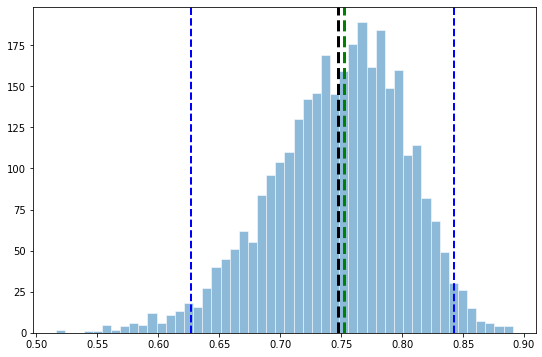

Correlación sin Bootsrap: 0.7526621356232132
Promedio de correlación de la muestras Bootstrap: 0.7471735420039525
Error estándar las muestras Bootstrap: 0.05544886992211036
( 0.627056360871604 , 0.842496949623107 )


In [83]:
#Hacemos el gráfico 
fig, ax = plt.subplots(figsize=(9,6))
hist(cor_3,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=cor_data,color='green', linestyle='--',linewidth=3,label="Correlación sin bootstrap$")
axvline(x=np.mean(cor_3),color='black', linestyle='--',linewidth=3,label="Promedio de correlación con  Boostrap$")

axvline(percentile(cor_3,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(cor_3,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Correlación sin Bootsrap:", cor_data)
print("Promedio de correlación de la muestras Bootstrap:", np.mean(cor_3))
print("Error estándar las muestras Bootstrap:", err_bt_3)
print("(", percentile(cor_3,2.5),",",percentile(cor_3,97.5),")")

In [84]:
#Podemos notar que conforme el número de simulaciones Boostrap aumenta, el error estándar
#baja.
estimadores_se_bt3=np.zeros(3200)
for i in range(len(cor_3)):
    estimadores_se_bt3[i]=np.std(cor_3[0:(i+1)])
estimadores_se_bt3

array([0.        , 0.05841451, 0.05774788, ..., 0.05546066, 0.05545727,
       0.05544887])

In [106]:
min_3=min(estimadores_se_bt3[20:])
min_3

0.05492424291739675

In [105]:
index_3=(np.asarray(estimadores_se_bt3==min_3).nonzero())[0][0]
index_3

171

In [102]:
estimadores_se_bt3[index_3]

0.05492424291739675

Acorde a esto, 79 simulaciones boostrap minimiza el error estándar. Ya que el índice i es hasta i+1 iteraciones boostrap

# Pregunta 3

In [2]:
bd2="lineal_horm.xlsx"
bd_horm=pd.read_excel(bd2)
bd_horm

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6
5,A,53,31.1
6,A,184,20.9
7,A,171,20.9
8,A,52,30.4
9,B,376,16.3


In [7]:
reg = linear_model.LinearRegression()

In [8]:
X = bd_horm[["horas"]]
y = bd_horm[["monto"]]
reg.fit(X,y)
Y_pred = reg.predict(X)
y_estim=Y_pred.reshape(-1)
x=X.to_numpy().reshape(-1)
y_real=y.to_numpy()
y_real=y_real.reshape(-1)
n=len(y_real)
residual=y_real-y_estim
den=sum((x-np.mean(x))**2)
num=sum(residual**2)/(n)
err_reg_completa=np.sqrt(num/den)
err_reg_completa

0.004295652626358282

In [126]:
#Seleccionamos aleatoriamente n=15 muestras
sims=3200
errores=np.zeros(sims)
for  i in range(0,sims):
    horm_random=bd_horm.sample(n=15,replace=True)
    X = horm_random[["horas"]]
    y = horm_random[["monto"]]
    reg.fit(X, y)
    Y_pred = reg.predict(X)
    y_estim=Y_pred.reshape(-1)
    x=X.to_numpy().reshape(-1)
    y_real=y.to_numpy()
    y_real=y_real.reshape(-1)
    n=len(y_real)
    residual=y_real-y_estim
    den=sum((x-np.mean(x))**2)
    num=sum(residual**2)/(n)
    err_reg=np.sqrt(num/den)
    errores[i]=err_reg
print(errores)

[0.00650683 0.00572345 0.00354918 ... 0.00481922 0.00352027 0.00801548]


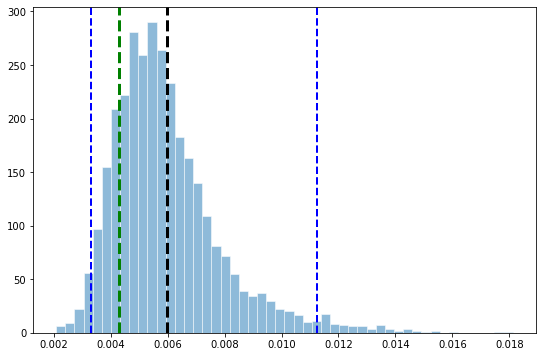

Error Estándar sin Bootsrap: 0.004295652626358282
Promedio de Error Estándar de la muestras Bootstrap: 0.005963861555921929
Promedio de Error Estándar de la muestras Bootstrap: 0.005963861555921929
( 0.0033205041665581502 , 0.011236727272079595 )


In [127]:
fig, ax = plt.subplots(figsize=(9,6))
hist(errores,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=err_reg_completa,color='green', linestyle='--',linewidth=3,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(errores),color='black', linestyle='--',linewidth=3,label="Promedio error estándar de b_1 con  Boostrap$")

axvline(percentile(errores,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(errores,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error Estándar sin Bootsrap:", err_reg_completa)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(errores))
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(errores))
print("(", percentile(errores,2.5),",",percentile(errores,97.5),")")

Podemos observar que esta manera de atacar el problema resulta en un error mayor que el generado en clase a través del remuestreo de los errores estándar de una misma regresión. Cambiemos n

In [124]:
#Seleccionamos aleatoriamente n=15 muestras
sims_2=3200
errores_2=np.zeros(sims_2)
for  i in range(0,sims_2):
    horm_random=bd_horm.sample(n=len(bd_horm[["horas"]]),replace=True)
    X = horm_random[["horas"]]
    y = horm_random[["monto"]]
    reg.fit(X, y)
    Y_pred = reg.predict(X)
    y_estim=Y_pred.reshape(-1)
    x=X.to_numpy().reshape(-1)
    y_real=y.to_numpy()
    y_real=y_real.reshape(-1)
    n=len(y_real)
    residual=y_real-y_estim
    den=sum((x-np.mean(x))**2)
    num=sum(residual**2)/(n)
    err_reg=np.sqrt(num/den)
    errores_2[i]=err_reg
print(errores_2)

[0.00318752 0.00354275 0.00477575 ... 0.00625507 0.00461365 0.00515329]


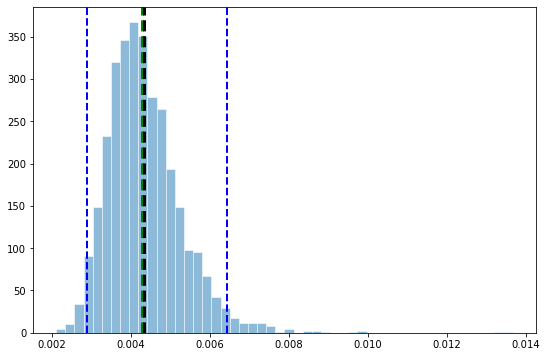

Error Estándar sin Bootsrap: 0.004295652626358282
Promedio de Error Estándar de la muestras Bootstrap: 0.004352224487050207
Promedio de Error Estándar de la muestras Bootstrap: 0.004352224487050207
( 0.0029025949465638435 , 0.006444142079389668 )


In [125]:
fig, ax = plt.subplots(figsize=(9,6))
hist(errores_2,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=err_reg_completa,color='green', linestyle='--',linewidth=3,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(errores_2),color='black', linestyle='--',linewidth=3,label="Promedio error estándar de b_1 con  Boostrap$")

axvline(percentile(errores_2,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(errores_2,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error Estándar sin Bootsrap:", err_reg_completa)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(errores_2))
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(errores_2))
print("(", percentile(errores_2,2.5),",",percentile(errores_2,97.5),")")

¡Obtuvimos un error menor! en promedio

In [5]:
bd_horm.groupby(['lote']).sample(n=2,replace=True)

,lote,horas,monto
2,A,293,14.3
0,A,99,25.8
15,B,151,24.1
10,B,385,11.6
21,C,88,28.9
25,C,107,31.7


In [18]:
#Seleccionamos aleatoriamente n muestras de cada lote
n=4
sims_3=10
errores_3=np.zeros(sims_3)
for  i in range(0,sims_3):
    horm_random=bd_horm.groupby(['lote']).sample(n=n,replace=True)
    X = horm_random[["horas"]]
    y = horm_random[["monto"]]
    reg.fit(X, y)
    Y_pred = reg.predict(X)
    y_estim=Y_pred.reshape(-1)
    x=X.to_numpy().reshape(-1)
    y_real=y.to_numpy()
    y_real=y_real.reshape(-1)
    n=len(y_real)
    residual=y_real-y_estim
    den=sum((x-np.mean(x))**2)
    num=sum(residual**2)/(n)
    err_reg=np.sqrt(num/den)
    errores_3[i]=err_reg
print(errores_3)

   lote  horas  monto
0     A     99   25.8
4     A    196   20.6
2     A    293   14.3
2     A    293   14.3
11    B    402   11.8
13    B     76   32.0
10    B    385   11.6
16    B    177   26.5
26    C    125   28.5
18    C    119   28.8
25    C    107   31.7
21    C     88   28.9
   lote  horas  monto
2     A    293   14.3
2     A    293   14.3
4     A    196   20.6
8     A     52   30.4
2     A    293   14.3
3     A    155   23.2
0     A     99   25.8
1     A    152   20.5
6     A    184   20.9
4     A    196   20.6
2     A    293   14.3
6     A    184   20.9
14    B    296   18.0
16    B    177   26.5
10    B    385   11.6
13    B     76   32.0
14    B    296   18.0
11    B    402   11.8
9     B    376   16.3
17    B    209   25.8
17    B    209   25.8
13    B     76   32.0
11    B    402   11.8
17    B    209   25.8
19    C    188   22.0
19    C    188   22.0
25    C    107   31.7
24    C    150   25.4
24    C    150   25.4
22    C     58   32.8
22    C     58   32.8
22    C   

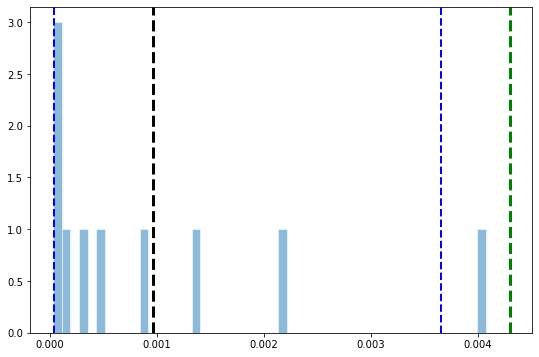

Error Estándar sin Bootsrap: 0.004295652626358282
Promedio de Error Estándar de la muestras Bootstrap: 0.000960815781656399
Promedio de Error Estándar de la muestras Bootstrap: 0.000960815781656399
( 3.570943931708634e-05 , 0.003650902984699501 )


In [15]:
fig, ax = plt.subplots(figsize=(9,6))
hist(errores_3,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=err_reg_completa,color='green', linestyle='--',linewidth=3,label="Error Estándar de b_1 con regresión$")
axvline(x=np.mean(errores_3),color='black', linestyle='--',linewidth=3,label="Promedio error estándar de b_1 con  Boostrap$")

axvline(percentile(errores_3,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(errores_3,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Error Estándar sin Bootsrap:", err_reg_completa)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(errores_3))
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(errores_3))
print("(", percentile(errores_3,2.5),",",percentile(errores_3,97.5),")")